In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [134]:
# read csv files
confirmed = pd.read_csv('covid_confirmed_usafacts.csv')
deaths = pd.read_csv('covid_deaths_usafacts.csv')
population = pd.read_csv('covid_county_population_usafacts.csv')

In [135]:
# clean the data
def stats(file, state):
    state_name = file.drop(file[file['State'] != state].index)

    # isolate the data into 2 parts.
    # date_cols: only has columns with date data
    # info_cols: holds countyFIPS, county name, state and State FIPS
    datecols = state_name.iloc[:, 4:]
    front = state_name.iloc[:,:4]

    # calculate the difference
    datecols = datecols.diff(axis='columns')
    
    # filter dates only between 6/1/2022 and 12/31/2022
    left = datecols.columns.get_loc('2022-06-01')
    right = datecols.columns.get_loc('2022-12-31')
    datecols = datecols.iloc[:, left:(right+1)]
    
    # convert dated column labels to datetime
    datecols.columns = pd.to_datetime(datecols.columns, format='%Y-%m-%d')
    
    # turn into weeks
    datecols.columns = datecols.columns.isocalendar()
    
#     POTENTIALL REMOVE THIS DEPENDING ON PROFESSOR'S ANSWER TO CLEAN DADTA
#     remove week 22 and week 52 due to incomplete data for full week
    left = datecols.columns.get_loc((2022, 23, 1))
    right = datecols.columns.get_loc((2022, 52, 1))
    datecols = datecols.iloc[:, left:right]
    
    # weekconv: holds future column names of the week it belongs to
    weekconv = []
    
    # loops through data and renames based on week 
    for i in range(len(datecols.columns)):
        weekconv.append(datecols.columns[i][1])
    
    # rename labels using weekconv
    datecols = datecols.set_axis(weekconv, axis=1)
    
    # group together and sums up all days per week
    datecols = datecols.groupby(level=0, axis=1).sum()
    
    # shows the new confirmed totals of each week in the entire state
    datecols = pd.DataFrame(datecols.sum()).transpose()
    
        
    median = (datecols.median(axis=1))[0]
    mean = (datecols.mean(axis=1))[0]
    mode = (datecols.mode(axis=1))[0]
    print(f"mean: {mean}\n median: {median}\n mode: {mode[0]}")

<h2>Generate weekly statistics (mean, median, mode) for number of new cases and deaths across a specific state.

In [137]:
print("___ CONFIRMED CASES FOR NC ___")
stats(confirmed, 'NC')
print("\n___ DEATH CASES FOR NC ___")
stats(deaths, 'NC')


___ CONFIRMED CASES FOR NC ___
mean: 18761.689655172413
 median: 20284.0
 mode: 0

___ DEATH CASES FOR NC ___
mean: 102.62068965517241
 median: 48.0
 mode: 30


<h3>Compare the data against 3 other states: GA, KY, TN

In [162]:
print("___ CONFIRMED CASES FOR GA ___")
stats(confirmed, 'GA')
print("\n___ DEATH CASES FOR GA ___")
stats(deaths, 'GA')


___ CONFIRMED CASES FOR GA ___
mean: 8775.172413793103
 median: 8967.0
 mode: -33194

___ DEATH CASES FOR GA ___
mean: 76.89655172413794
 median: 104.0
 mode: 3


In [163]:
print("___ CONFIRMED CASES FOR KY ___")
stats(confirmed, 'KY')
print("\n___ DEATH CASES FOR KY ___")
stats(deaths, 'KY')


___ CONFIRMED CASES FOR KY ___
mean: 10297.862068965518
 median: 9499.0
 mode: 3626

___ DEATH CASES FOR KY ___
mean: 57.93103448275862
 median: 59.0
 mode: 59


In [164]:
print("___ CONFIRMED CASES FOR TN ___")
stats(confirmed, 'TN')
print("\n___ DEATH CASES FOR TN ___")
stats(deaths, 'TN')


___ CONFIRMED CASES FOR TN ___
mean: 10032.48275862069
 median: 10800.0
 mode: 0

___ DEATH CASES FOR TN ___
mean: 55.93103448275862
 median: 77.0
 mode: 0


In [139]:
# calculation of state populations
def state_pop(file, state):
    df = file.drop(file[file['State'] != state].index)
    pop_sum = df['population'].sum()
    return pop_sum

GA_pop =  state_pop(population, 'GA')

TN_pop = state_pop(population, 'TN')

CT_pop = state_pop(population, 'CT')

KY_pop = state_pop(population, 'KY')

In [140]:
total_pop = GA_pop + TN_pop + CT_pop + KY_pop
total_pop
# about 25 million

25479557

In [141]:
# normalize the data of given state and data type (confirmed cases or deaths recorded)
def normalized(file, state):
    state_name = file.drop(file[file['State'] != state].index)

    # isolate the data into 2 parts.
    # date_cols: only has columns with date data
    # info_cols: holds countyFIPS, county name, state and State FIPS
    datecols = state_name.iloc[:, 4:]
    front = state_name.iloc[:,:4]
    
    # calculate the difference
    datecols = datecols.diff(axis='columns')
    
    # filter dates only between 6/1/2022 and 12/31/2022
    left = datecols.columns.get_loc('2022-06-01')
    right = datecols.columns.get_loc('2022-12-31')
    datecols = datecols.iloc[:, left:(right+1)]
    
    # convert dated column labels to datetime
    datecols.columns = pd.to_datetime(datecols.columns, format='%Y-%m-%d')
    
    # turn into weeks
    datecols.columns = datecols.columns.isocalendar()
    
#     remove week 22 and week 52 due to incomplete data for full week
    left = datecols.columns.get_loc((2022, 23, 1))
    right = datecols.columns.get_loc((2022, 52, 1))
    datecols = datecols.iloc[:, left:right]
    
    # weekconv: holds future column names of the week it belongs to
    weekconv = []
    
    # loops through data and renames based on week 
    for i in range(len(datecols.columns)):
        weekconv.append(datecols.columns[i][1])
    
    # rename labels using weekconv
    datecols = datecols.set_axis(weekconv, axis=1)
    
    # group together and sums up all days per week
    datecols = datecols.groupby(level=0, axis=1).sum()
    
    
    # normalize by 25 million
    datecols = datecols/25000000
    
    # shows the new confirmed totals of each week in the entire state
    datecols = pd.DataFrame(datecols.sum()).transpose()
    
        
    median = (datecols.median(axis=1))[0]
    mean = (datecols.mean(axis=1))[0]
    mode = (datecols.mode(axis=1))[0]
    print(f"mean: {mean}\n median: {median}\n mode: {mode[0]}")

<H2> normalize by population

In [144]:
print("___ NORMALIZEED CONFIRMED CASES FOR NC ___")
normalized(confirmed, 'NC')
print("\n___ NORMALIZED DEATH CASES FOR NC ___")
normalized(deaths, 'NC')


___ NORMALIZEED CONFIRMED CASES FOR NC ___
mean: 0.0007504675862068966
 median: 0.00081136
 mode: 0.0

___ NORMALIZED DEATH CASES FOR NC ___
mean: 4.104827586206897e-06
 median: 1.92e-06
 mode: 1.92e-06


In [142]:
print("___ NORMALIZEED CONFIRMED CASES FOR GA ___")
normalized(confirmed, 'GA')
print("\n___ NORMALIZED DEATH CASES FOR GA ___")
normalized(deaths, 'GA')


___ NORMALIZEED CONFIRMED CASES FOR GA ___
mean: 0.000351006896551724
 median: 0.00035868
 mode: -0.0013277599999999999

___ NORMALIZED DEATH CASES FOR GA ___
mean: 3.075862068965517e-06
 median: 4.16e-06
 mode: 1.2e-07


In [145]:
print("___ NORMALIZEED CONFIRMED CASES FOR KY ___")
normalized(confirmed, 'KY')
print("\n___ NORMALIZED DEATH CASES FOR KY ___")
normalized(deaths, 'KY')


___ NORMALIZEED CONFIRMED CASES FOR KY ___
mean: 0.00041191448275862077
 median: 0.00037996000000000004
 mode: 0.00014503999999999998

___ NORMALIZED DEATH CASES FOR KY ___
mean: 2.3172413793103447e-06
 median: 2.3600000000000003e-06
 mode: 2.3600000000000003e-06


In [143]:
print("___ NORMALIZEED CONFIRMED CASES FOR TN ___")
normalized(confirmed, 'TN')
print("\n___ NORMALIZED DEATH CASES FOR TN ___")
normalized(deaths, 'TN')


___ NORMALIZEED CONFIRMED CASES FOR TN ___
mean: 0.0004012993103448275
 median: 0.000432
 mode: 0.0

___ NORMALIZED DEATH CASES FOR TN ___
mean: 2.2372413793103446e-06
 median: 3.08e-06
 mode: 0.0


In [146]:
# find counties with highest cases and death rates
def norm_state(file, state):
    state_name = file.drop(file[file['State'] != state].index)

    # isolate the data into 2 parts.
    # date_cols: only has columns with date data
    # info_cols: holds countyFIPS, county name, state and State FIPS
    datecols = state_name.iloc[:, 4:]
    front = state_name.iloc[:,:4]

    # calculate the difference
    datecols = datecols.diff(axis='columns')
    
    # filter dates only between 6/1/2022 and 12/31/2022
    left = datecols.columns.get_loc('2022-06-01')
    right = datecols.columns.get_loc('2022-12-31')
    datecols = datecols.iloc[:, left:(right+1)]
    
    # convert dated column labels to datetime
    datecols.columns = pd.to_datetime(datecols.columns, format='%Y-%m-%d')
    
    # turn into weeks
    datecols.columns = datecols.columns.isocalendar()
    
#     POTENTIALL REMOVE THIS DEPENDING ON PROFESSOR'S ANSWER TO CLEAN DADTA
#     remove week 22 and week 52 due to incomplete data for full week
    left = datecols.columns.get_loc((2022, 23, 1))
    right = datecols.columns.get_loc((2022, 52, 1))
    datecols = datecols.iloc[:, left:right]
    
    # weekconv: holds future column names of the week it belongs to
    weekconv = []
    
    # loops through data and renames based on week 
    for i in range(len(datecols.columns)):
        weekconv.append(datecols.columns[i][1])
    
    # rename labels using weekconv
    datecols = datecols.set_axis(weekconv, axis=1)
    
    # group together and sums up all days per week
    datecols = datecols.groupby(level=0, axis=1).sum()
    
    
    # normalize by 25 million
    datecols = datecols/25000000
    
    
    # shows the new confirmed totals of each week in the entire state
    datecols = pd.DataFrame(datecols.sum()).transpose()
    
    return datecols

In [147]:
#  return df of normalized rates for entire country, of confirmed or deaths
def norm_usa(file):
    # isolate the data into 2 parts.
    # date_cols: only has columns with date data
    # info_cols: holds countyFIPS, county name, state and State FIPS
    datecols = file.iloc[:, 4:]
    front = file.iloc[:,:4]
    
    # calculate the difference
    datecols = datecols.diff(axis='columns')
    
    # filter dates only between 6/1/2022 and 12/31/2022
    left = datecols.columns.get_loc('2022-06-01')
    right = datecols.columns.get_loc('2022-12-31')
    datecols = datecols.iloc[:, left:(right+1)]
    
    # convert dated column labels to datetime
    datecols.columns = pd.to_datetime(datecols.columns, format='%Y-%m-%d')
    
    # turn into weeks
    datecols.columns = datecols.columns.isocalendar()
    
#     POTENTIALL REMOVE THIS DEPENDING ON PROFESSOR'S ANSWER TO CLEAN DADTA
#     remove week 22 and week 52 due to incomplete data for full week
    left = datecols.columns.get_loc((2022, 23, 1))
    right = datecols.columns.get_loc((2022, 52, 1))
    datecols = datecols.iloc[:, left:right]
    
    # weekconv: holds future column names of the week it belongs to
    weekconv = []
    
    # loops through data and renames based on week 
    for i in range(len(datecols.columns)):
        weekconv.append(datecols.columns[i][1])
    
    # rename labels using weekconv
    datecols = datecols.set_axis(weekconv, axis=1)
    
    # group together and sums up all days per week
    datecols = datecols.groupby(level=0, axis=1).sum()
    
    # normalize by 25 million
    datecols = datecols/25000000
    
    # shows the new confirmed totals of each week in the entire state
    datecols = pd.DataFrame(datecols.sum()).transpose()
    
    return datecols

<h2>Plot the values across the weeks in a line plot for the 3 states in a single graph. </h2><br>
<b>Describe why the rates differ across these states in the notebook. </b>
<br> It could be different between different state due to different legislation choices such as mask mandates, vaccination rules in companies, density of the population of each area, etc.

<br><b>Identify the peaks, are they consistent with the US pattern?</b><br>
    Though we see some variation, overall it is consistant with the US pattern. We see its rise at its peak around 30 weeks for the states. From here there is an overall decline, but around week 43, we see a steady rise re-occur throughout the state and US data.

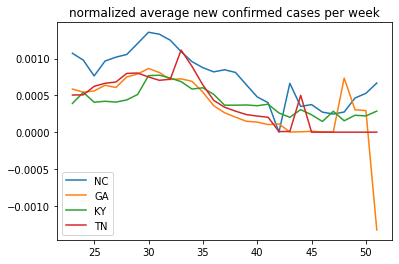

In [167]:
# plot states

NC_conf_norm = norm_state(confirmed, 'NC')
GA_conf_norm = norm_state(confirmed, 'GA')
KY_conf_norm = norm_state(confirmed, 'KY')
TN_conf_norm = norm_state(confirmed, 'TN')

def norm_confirmed_state_plot(df1, df2, df3, df4):
    df1 = df1.transpose()
    df2 = df2.transpose()
    df3 = df3.transpose()
    df4 = df4.transpose()
    
    plt.plot(df1[0], label='NC')
    plt.plot(df2[0], label='GA')
    plt.plot(df3[0], label='KY')
    plt.plot(df4[0], label='TN')
    plt.title('normalized average new confirmed cases per week')
    plt.legend()
    

norm_confirmed_state_plot(NC_conf_norm, GA_conf_norm, KY_conf_norm, TN_conf_norm)

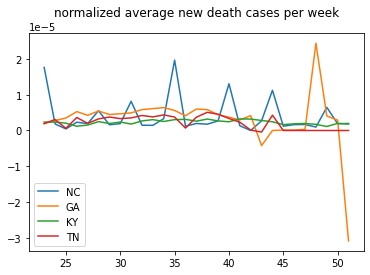

In [170]:
# plot states

NC_death_norm = norm_state(deaths, 'NC')
GA_death_norm = norm_state(deaths, 'GA')
KY_death_norm = norm_state(deaths, 'KY')
TN_death_norm = norm_state(deaths, 'TN')

def norm_death_state_plot(df1, df2, df3, df4):
    df1 = df1.transpose()
    df2 = df2.transpose()
    df3 = df3.transpose()
    df4 = df4.transpose()
    
    plt.plot(df1[0], label='NC')
    plt.plot(df2[0], label='GA')
    plt.plot(df3[0], label='KY')
    plt.plot(df4[0], label='TN')
    plt.title('normalized average new death cases per week')
    plt.legend()
    

norm_death_state_plot(NC_death_norm, GA_death_norm, KY_death_norm, TN_death_norm)


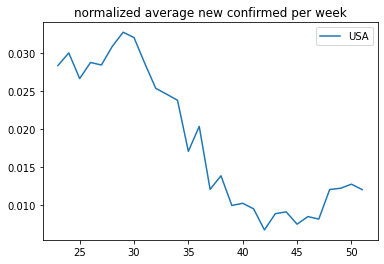

In [150]:
usa_conf = norm_usa(confirmed)

def norm_conf_plot(df):
    df1 = df.transpose()
    
    plt.plot(df1[0], label='USA')
    plt.title('normalized average new confirmed per week')
    plt.legend()
    
norm_conf_plot(usa_conf)

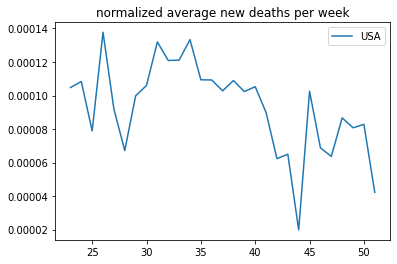

In [151]:

def norm_death_plot(df):
    df1 = df.transpose()
    
    plt.plot(df1[0], label='USA')
    plt.title('normalized average new deaths per week')
    plt.legend()

usa_deaths = norm_usa(deaths)
norm_death_plot(usa_deaths)

In [152]:
# find counties with highest cases and death rates
def counties(file, state):
    state_name = file.drop(file[file['State'] != state].index)

    # isolate the data into 2 parts.
    # date_cols: only has columns with date data
    # info_cols: holds countyFIPS, county name, state and State FIPS
    datecols = state_name.iloc[:, 4:]
    front = state_name.iloc[:,:4]

    # normalize 
    datecols = datecols/25000000
    
    # calculate the difference
    datecols = datecols.diff(axis='columns')
    
    # filter dates only between 6/1/2022 and 12/31/2022
    left = datecols.columns.get_loc('2022-06-01')
    right = datecols.columns.get_loc('2022-12-31')
    datecols = datecols.iloc[:, left:(right+1)]
    
    # convert dated column labels to datetime
    datecols.columns = pd.to_datetime(datecols.columns, format='%Y-%m-%d')
    
    # turn into weeks
    datecols.columns = datecols.columns.isocalendar()
    
#     POTENTIALL REMOVE THIS DEPENDING ON PROFESSOR'S ANSWER TO CLEAN DADTA
#     remove week 22 and week 52 due to incomplete data for full week
    left = datecols.columns.get_loc((2022, 23, 1))
    right = datecols.columns.get_loc((2022, 52, 1))
    datecols = datecols.iloc[:, left:right]
    
    # weekconv: holds future column names of the week it belongs to
    weekconv = []
    
    # loops through data and renames based on week 
    for i in range(len(datecols.columns)):
        weekconv.append(datecols.columns[i][1])
    
    # rename labels using weekconv
    datecols = datecols.set_axis(weekconv, axis=1)
    
    # group together and sums up all days per week
    datecols = datecols.groupby(level=0, axis=1).sum()
    
    #calculate ethe average of each row/county
    county_avg = datecols.mean(axis=1)
    
    #convert to panda df
    df = pd.DataFrame(county_avg)
    
    largest =  df.nlargest(3, columns=[df.columns[0]])
    largest_index = largest.index.tolist()
    first = largest_index[0]
    second = largest_index[1]
    third = largest_index[2]

    return largest, front.loc[first, 'County Name'], front.loc[second, 'County Name'], front.loc[third, 'County Name']
        

<h2>Identify 3 counties within a state of your choice with high cases and death rates.</h2>
<br><br><b> Highest new case counties in NC: </b>
<br>1. Wake County
<br>2. Mecklenburg County
<br>3. Guilford County

<br><b> Highest deaths in counties in NC: </b>
<br>1. Mecklenburg County
<br>2. Guilford County
<br>3. Wake County

In [153]:
# return highest new confirmd 
counties(confirmed, 'NC')

(             0
 2015  0.000083
 1983  0.000081
 1964  0.000036,
 'Wake County ',
 'Mecklenburg County ',
 'Guilford County ')

In [154]:
# return highest deaths
counties(deaths, 'NC')

(                 0
 1983  2.965517e-07
 1964  2.372414e-07
 2015  2.303448e-07,
 'Mecklenburg County ',
 'Guilford County ',
 'Wake County ')

<h2>plot weekly trends of top 3 infected counties

In [155]:
# find counties with highest cases and death rates
def conf_counties(state):
    state_name = confirmed.drop(confirmed[confirmed['State'] != state].index)

    # isolate the data into 2 parts.
    # date_cols: only has columns with date data
    # info_cols: holds countyFIPS, county name, state and State FIPS
    datecols = state_name.iloc[:, 4:]
    front = state_name.iloc[:,:4]

    # calculate the difference
    datecols = datecols.diff(axis='columns')
    
    # filter dates only between 6/1/2022 and 12/31/2022
    left = datecols.columns.get_loc('2022-06-01')
    right = datecols.columns.get_loc('2022-12-31')
    datecols = datecols.iloc[:, left:(right+1)]
    
    # convert dated column labels to datetime
    datecols.columns = pd.to_datetime(datecols.columns, format='%Y-%m-%d')
    
    # turn into weeks
    datecols.columns = datecols.columns.isocalendar()
    
#     POTENTIALL REMOVE THIS DEPENDING ON PROFESSOR'S ANSWER TO CLEAN DADTA
#     remove week 22 and week 52 due to incomplete data for full week
    left = datecols.columns.get_loc((2022, 23, 1))
    right = datecols.columns.get_loc((2022, 52, 1))
    datecols = datecols.iloc[:, left:right]
    
    # weekconv: holds future column names of the week it belongs to
    weekconv = []
    
    # loops through data and renames based on week 
    for i in range(len(datecols.columns)):
        weekconv.append(datecols.columns[i][1])
    
    # rename labels using weekconv
    datecols = datecols.set_axis(weekconv, axis=1)
    
    # group together and sums up all days per week
    datecols = datecols.groupby(level=0, axis=1).sum()
    
    #calculate ethe average of each row/county
    county_avg = datecols.mean(axis=1)
    
    #convert to panda df
    df = pd.DataFrame(county_avg)
    
    largest =  df.nlargest(3, columns=[df.columns[0]])
    largest_index = largest.index.tolist()
    first = largest_index[0]
    second = largest_index[1]
    third = largest_index[2]

    county1 = front.loc[first, 'County Name']
    county2 = front.loc[second, 'County Name']
    county3 = front.loc[third, 'County Name']
    
    df1 = datecols.loc[first]
    df2 = datecols.loc[second]
    df3 = datecols.loc[third]
    
    plt.plot(df1, label=county1)
    plt.plot(df2, label=county2)
    plt.plot(df3, label=county3)
    plt.title('normalized average new confirmed cases per week')
    plt.legend()
        
# find counties with highest cases and death rates
def death_counties(state):
    state_name = deaths.drop(deaths[deaths['State'] != state].index)

    # isolate the data into 2 parts.
    # date_cols: only has columns with date data
    # info_cols: holds countyFIPS, county name, state and State FIPS
    datecols = state_name.iloc[:, 4:]
    front = state_name.iloc[:,:4]

    # calculate the difference
    datecols = datecols.diff(axis='columns')
    
    # filter dates only between 6/1/2022 and 12/31/2022
    left = datecols.columns.get_loc('2022-06-01')
    right = datecols.columns.get_loc('2022-12-31')
    datecols = datecols.iloc[:, left:(right+1)]
    
    # convert dated column labels to datetime
    datecols.columns = pd.to_datetime(datecols.columns, format='%Y-%m-%d')
    
    # turn into weeks
    datecols.columns = datecols.columns.isocalendar()
    
#     POTENTIALL REMOVE THIS DEPENDING ON PROFESSOR'S ANSWER TO CLEAN DADTA
#     remove week 22 and week 52 due to incomplete data for full week
    left = datecols.columns.get_loc((2022, 23, 1))
    right = datecols.columns.get_loc((2022, 52, 1))
    datecols = datecols.iloc[:, left:right]
    
    # weekconv: holds future column names of the week it belongs to
    weekconv = []
    
    # loops through data and renames based on week 
    for i in range(len(datecols.columns)):
        weekconv.append(datecols.columns[i][1])
    
    # rename labels using weekconv
    datecols = datecols.set_axis(weekconv, axis=1)
    
    # group together and sums up all days per week
    datecols = datecols.groupby(level=0, axis=1).sum()
    
    #calculate ethe average of each row/county
    county_avg = datecols.mean(axis=1)
    
    #convert to panda df
    df = pd.DataFrame(county_avg)
    
    largest =  df.nlargest(3, columns=[df.columns[0]])
    largest_index = largest.index.tolist()
    first = largest_index[0]
    second = largest_index[1]
    third = largest_index[2]

    county1 = front.loc[first, 'County Name']
    county2 = front.loc[second, 'County Name']
    county3 = front.loc[third, 'County Name']
    
    df1 = datecols.loc[first]
    df2 = datecols.loc[second]
    df3 = datecols.loc[third]
    
    plt.plot(df1, label=county1)
    plt.plot(df2, label=county2)
    plt.plot(df3, label=county3)
    plt.title('normalized average new deaths per week')
    plt.legend()
        
        

In [156]:
# find counties with highest cases and death rates
def lg_conf_counties(state):
    state_name = confirmed.drop(confirmed[confirmed['State'] != state].index)

    # isolate the data into 2 parts.
    # date_cols: only has columns with date data
    # info_cols: holds countyFIPS, county name, state and State FIPS
    datecols = state_name.iloc[:, 4:]
    front = state_name.iloc[:,:4]

    # calculate the difference
    datecols = datecols.diff(axis='columns')
    
    # filter dates only between 6/1/2022 and 12/31/2022
    left = datecols.columns.get_loc('2022-06-01')
    right = datecols.columns.get_loc('2022-12-31')
    datecols = datecols.iloc[:, left:(right+1)]
    
    # convert dated column labels to datetime
    datecols.columns = pd.to_datetime(datecols.columns, format='%Y-%m-%d')
    
    # turn into weeks
    datecols.columns = datecols.columns.isocalendar()
    
#     POTENTIALL REMOVE THIS DEPENDING ON PROFESSOR'S ANSWER TO CLEAN DADTA
#     remove week 22 and week 52 due to incomplete data for full week
    left = datecols.columns.get_loc((2022, 23, 1))
    right = datecols.columns.get_loc((2022, 52, 1))
    datecols = datecols.iloc[:, left:right]
    
    # weekconv: holds future column names of the week it belongs to
    weekconv = []
    
    # loops through data and renames based on week 
    for i in range(len(datecols.columns)):
        weekconv.append(datecols.columns[i][1])
    
    # rename labels using weekconv
    datecols = datecols.set_axis(weekconv, axis=1)
    
    # group together and sums up all days per week
    datecols = datecols.groupby(level=0, axis=1).sum()
    
    #calculate ethe average of each row/county
    county_avg = datecols.mean(axis=1)
    
    #convert to panda df
    df = pd.DataFrame(county_avg)
    
    largest =  df.nlargest(3, columns=[df.columns[0]])
    largest_index = largest.index.tolist()
    first = largest_index[0]
    second = largest_index[1]
    third = largest_index[2]

    county1 = front.loc[first, 'County Name']
    county2 = front.loc[second, 'County Name']
    county3 = front.loc[third, 'County Name']
    
    
    # log normalize plus an added number so that the value is above 0
    datecols = np.log(datecols + 900)
    
    df1 = datecols.loc[first]
    df2 = datecols.loc[second]
    df3 = datecols.loc[third]
    
    plt.plot(df1, label=county1)
    plt.plot(df2, label=county2)
    plt.plot(df3, label=county3)
    plt.title('Log normalized average new confirmed cases per week')
    plt.legend()
        
# find counties with highest cases and death rates
def lg_death_counties(state):
    state_name = deaths.drop(deaths[deaths['State'] != state].index)

    # isolate the data into 2 parts.
    # date_cols: only has columns with date data
    # info_cols: holds countyFIPS, county name, state and State FIPS
    datecols = state_name.iloc[:, 4:]
    front = state_name.iloc[:,:4]

    # calculate the difference
    datecols = datecols.diff(axis='columns')
    
    # filter dates only between 6/1/2022 and 12/31/2022
    left = datecols.columns.get_loc('2022-06-01')
    right = datecols.columns.get_loc('2022-12-31')
    datecols = datecols.iloc[:, left:(right+1)]
    
    # convert dated column labels to datetime
    datecols.columns = pd.to_datetime(datecols.columns, format='%Y-%m-%d')
    
    # turn into weeks
    datecols.columns = datecols.columns.isocalendar()
    
#     POTENTIALL REMOVE THIS DEPENDING ON PROFESSOR'S ANSWER TO CLEAN DADTA
#     remove week 22 and week 52 due to incomplete data for full week
    left = datecols.columns.get_loc((2022, 23, 1))
    right = datecols.columns.get_loc((2022, 52, 1))
    datecols = datecols.iloc[:, left:right]
    
    # weekconv: holds future column names of the week it belongs to
    weekconv = []
    
    # loops through data and renames based on week 
    for i in range(len(datecols.columns)):
        weekconv.append(datecols.columns[i][1])
    
    # rename labels using weekconv
    datecols = datecols.set_axis(weekconv, axis=1)
    
    # group together and sums up all days per week
    datecols = datecols.groupby(level=0, axis=1).sum()
    
    #calculate ethe average of each row/county
    county_avg = datecols.mean(axis=1)
    
    #convert to panda df
    df = pd.DataFrame(county_avg)
    
    largest =  df.nlargest(3, columns=[df.columns[0]])
    largest_index = largest.index.tolist()
    first = largest_index[0]
    second = largest_index[1]
    third = largest_index[2]

    county1 = front.loc[first, 'County Name']
    county2 = front.loc[second, 'County Name']
    county3 = front.loc[third, 'County Name']
    
    
    # log normalize plus an added number so that the value is above 0
    datecols = np.log(datecols + 900)
    
    
    df1 = datecols.loc[first]
    df2 = datecols.loc[second]
    df3 = datecols.loc[third]
    
    plt.plot(df1, label=county1)
    plt.plot(df2, label=county2)
    plt.plot(df3, label=county3)
    plt.title('Log normalized average new deaths per week')
    plt.legend()
        
        

<h2>Plot weekly trends (new cases and deaths) for the top 3 infected counties. Show plots by raw values and log normalized values.  </h2>

<b>Describe what is causing them and what were the peaks.</b> <br>
    It appears high initially as people tend to vacation most in the summer. After an overall decline, a peak appears around week 30, which is around the time where school starts up again for students so there is a possibility that this effects the spread as contact increases for many households again. Another speak appears to occur around week 43, which could be explained by Halloween, which is a common holiday with contact as well. From here there is an increase which could be explained by Thanksgiving, Spring Break, and overall holiday season in which there is an increase in travel.
<br>    <b>Do the counties follow state pattern.</b><br>
The counties do resemble the overall state pattern.

<h3> Raw new confirmed cases in top NC counties vs log normalized new confirmed cases in top NC counties


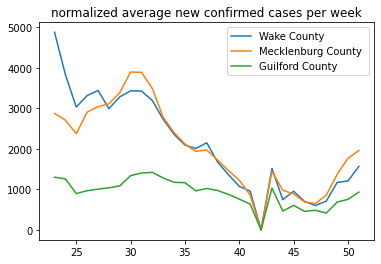

In [157]:
conf_counties('NC')

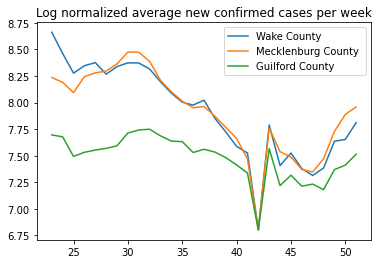

In [158]:
lg_conf_counties('NC')

<h3> Raw new deaths in top NC counties vs log normalized new deaths in top NC counties


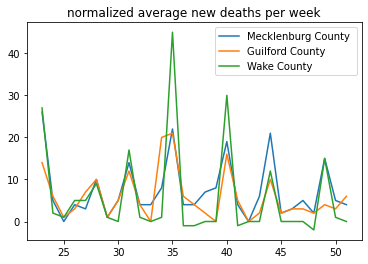

In [159]:
death_counties('NC')

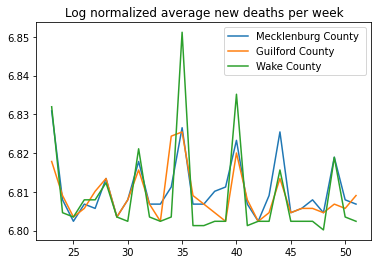

In [160]:
lg_death_counties('NC')